In [121]:
import input as i
import alg as a
import numpy as np
from importlib import reload
reload(i); reload(a);
import matplotlib.pyplot as plt
import pandas as pd

## Quick Test: DPOA($\omega$)
A random instance with $D \in [0,100], B = 60$ with perfect predictor, $\omega = 0.1$.

In [79]:
ins = i.Instance(B=60) # a random instant D
w = .1
print("D = ", ins.D, " B = ", ins.B)
p = i.PerfectPredictor(ins)
alg = a.DPOA(ins, p, w)
opt = a.OPT(ins)
print("{0:.3f}-consistant".format(alg/opt))

D =  83  B =  60
1.900-consistant


## Experiment 1: DPOA($\omega$)
$\omega = 0, 0.1,0.2,..., 1$; each scenario repeated 25 times; $B = 60$.

In [85]:
w_list = np.arange(0,1.1,.1)
repeat = 100
c_ratio = np.zeros((len(w_list), repeat))
for idx,w in enumerate(w_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=60)
#         print("D = ", ins.D, " B = ", ins.B)
        p = i.PrefectPredictor(ins)
        alg = a.DPOA(ins, p, w)
        opt = a.OPT(ins)
#         print("{0:.3f}-consistant".format(alg/opt))
        c_ratio[idx, j] = alg/opt
        


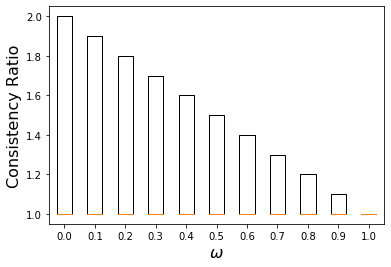

In [86]:
plt.clf()
plt.xlabel("$\omega$", fontsize=16)
plt.ylabel("Consistency Ratio", fontsize=16)

plt.boxplot(c_ratio.transpose());
positions = np.arange(1, len(w_list)+1)
formated_list = ['%.1f' % elem for elem in w_list ]
plt.xticks(positions, formated_list);

## Experiment 2: RPOA($\omega$)

In [129]:
w_list = np.arange(0,1,.1)
repeat = 30
alg_reps = 100
c_ratio = np.zeros((len(w_list), repeat))
for idx,w in enumerate(w_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=50)
        p = i.PrefectPredictor(ins)
        
        alg_total = 0
        for l in range(alg_reps):
            alg_total += a.RPOA(ins, p, w)
        opt = a.OPT(ins)
        alg_avg = alg_total/alg_reps
        c_ratio[idx, j] = alg_avg/opt

[1.71705234 1.56768917 1.39916229 1.32349857 1.33723253 1.20562697
 1.15461941 1.15110881 1.05858424 1.02983554]


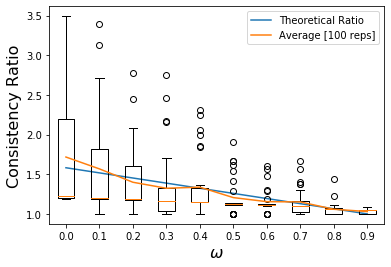

In [133]:
avg_ratio = c_ratio.sum(axis=1)/repeat
print(avg_ratio)
plt.clf()
plt.xlabel("$\omega$", fontsize=16)
plt.ylabel("Consistency Ratio", fontsize=16)
plt.plot([1, 10], [np.exp(1)/(np.exp(1) - 1), (np.exp(1)-.9)/(np.exp(1) - .9)  ], label= "Theoretical Ratio")
plt.boxplot(c_ratio.transpose());
positions = np.arange(1, len(w_list)+1)
plt.plot(positions, avg_ratio, label = "Average [100 reps]")
formated_list = ['%.1f' % elem for elem in w_list ]
plt.xticks(positions, formated_list);
plt.legend()



(10, 30)